<img src="../PythonBootcamp/support_files/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Data Set I: Cell Types </h1> 
<h3 align="center">Monday, August 22, 2016</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Drive path</h2>

<p>First things first - let's make sure your drive path is set up appropriately. You will want to un-comment only one of these options depending on which operating system you are running. You also may have to tweak the option for your specific set-up (e.g. change the drive letter for Windows).
</p>
</div>

In [1]:
# please make sure your drive_path is set, so that the notebook can find the data files on the hard drive

# OS X
# drive_path = '/Volumes/Brain2016'

# Windows (a good guess)
# drive_path = 'e:/'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2016/'

drive_path = '/mnt/fhl/'

drive_path = '/Users/michaelbu/Code/CellTypes/'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Cell Types Database</h2>

<p>
The Cell Types database contains data derived from single-cell experiments in the mouse visual cortex and lateral geniculate nucleus (LGN). This includes in vitro electrophysiological recordings from cortical slice experiments, morphological reconstructions based on single-neuron fills, and single-cell transcriptomic data from the LGN.</p>

<p>
The database can be accessed [on the web](https://celltypes.brain-map.org). This is useful for browsing and familiarizing yourself with the data, but for more in-depth analyses, it is often more efficient to access the data programmatically. The [AllenSDK](https://alleninstitute.github.io/AllenSDK/) provides Python-based tools to support that approach, and this notebook will introduce you to them.</p>

<p>
If you have not installed the `allensdk` python module yet, do so from a command prompt:</p>

<p>
   `> pip install allensdk` </p>
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>1. Using pre-computed features: Htr3a-expressing interneurons</h2>

<p>
Let's say we're interested in looking at interneuron diversity in the mouse visual cortex. We know that interneurons can be divided into three major types based on the expression of specific molecular markers - some interneurons express parvalbumin (Pvalb), others express somatostatin (Sst), and most of the rest express the ionotropic serotonin receptor 5HT3a (Htr3a).
</p>

<p>
We'll start by looking at the Htr3a-expressing interneurons, which have two major subpopulations - those that express vasointestinal peptide (Vip), and those that don't. Many of the non-Vip cells express neuron derived neurotrophic factor (Ndnf). In the Cell Types Database, we have cells that are labeled by transgenic lines driven by Htr3a-Cre, as well as cells with reporter expression driven by Vip-Cre and Ndnf-Cre. We can look at the properties of those cells to see if there are characteristic differences among these populations. 
</p>
<p>
We'll start by looking at pre-computed features of these cells. To access them, we'll use SDK components that interact with the database via its API.</p>
</div>

In [2]:
import os
import numpy as np
from allensdk.core.cell_types_cache import CellTypesCache

## A CellTypesCache is used to copy and cache data from the cell types database.
## If you create the CellTypesCache instance with no arguments, then data is downloaded
## from the online repository:
# ctc = CellTypesCache()

## Because we have limited internet bandwidth, the data you need is already provided on
## your external hard drive. To ensure this local data is used instead of the online
## repository, create the CellTypesCache instance using the `manifest_file` argument:
ctc = CellTypesCache(manifest_file=os.path.join(drive_path, 'cell_types', 'manifest.json'))

# here I'm using the web to get newer cells than what's on my 2016 HD
# ctc = CellTypesCache(cache=True) 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
**Documentation:**
[CellTypesCache](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache),
[CellTypesCache.get_ephys_features()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_ephys_features)
[CellTypesCache.get_cells()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_cells)</p>
<p>
*Note: you can find these by using the search tool on the main [AllenSDK page](http://alleninstitute.github.io/AllenSDK/)*
</p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.1:**</p>

<p>Use Python code to inspect which data type is returned by `ctc.get_ephys_features()`. (You can verify your answer with the API documentation)</p>

</div>

In [3]:
# ANSWER

type(ctc.get_ephys_features())

list

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.2:**</p>

<p>Use the function `ctc.get_cells()` to get all the cre reporter positive cells (we only want the cells actually labeled by the transgenic lines we're investigating). Store them in a variable named `cells`.</p>

</div>

In [4]:
# ANSWER

cells = ctc.get_cells(reporter_status=["cre reporter positive"])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Selecting specific populations

Now we'd like to just select the cells for particular transgenic lines (i.e., Htr3a, Vip, and Ndnf). The full names of those driver lines are:
* Htr3a-Cre_NO152
* Vip-IRES-Cre
* Ndnf-IRES2-dgCre

If we look at an entry in our `cells` list, we can see that there are several fields that are of use to us for this task.

In [5]:
example_cell = cells[0]

# The specimen ID - this is a handle to refer to a specific cell in the database
print "Specimen ID:", example_cell["id"]

# The transgenic line - the driver of the mouse from which the cell was recorded
print "Transgenic line:", example_cell["transgenic_line"]

# The dendrite type - this is whether or not a given cell has dendritic spines (generally a 
# feature of excitatory neurons)
print "Dendrite type:", example_cell["dendrite_type"]

Specimen ID: 514824979
Transgenic line: Htr3a-Cre_NO152
Dendrite type: aspiny


In [17]:
example_cell

{u'apical': u'NA',
 u'cell_prep_sample_id': None,
 u'cell_reporter': {u'id': 491913822, u'name': u'cre reporter positive'},
 u'cell_reporter_id': 491913822,
 u'cell_soma_locations': [{u'id': 535977022,
   u'normalized_depth': 0.592588250716659,
   u'reference_space_id': 9,
   u'specimen_id': 514824979,
   u'x': 9208.14292114,
   u'y': 1349.94404618,
   u'z': 3048.63914803}],
 u'data': None,
 u'data_sets': [{u'blue_channel': None,
   u'delegate': False,
   u'expression': False,
   u'failed': False,
   u'failed_facet': 734881840,
   u'green_channel': None,
   u'id': 518298467,
   u'name': u'T301-Ax.160426_01_B02_514824979',
   u'plane_of_section_id': 11,
   u'qc_date': None,
   u'red_channel': None,
   u'reference_space_id': None,
   u'rnaseq_design_id': None,
   u'section_thickness': 0.28,
   u'specimen_id': 514824979,
   u'sphinx_id': 166895,
   u'storage_directory': u'/external/mousecelltypes/prod757/image_series_518298467/',
   u'weight': 5300}],
 u'dendrite_type': u'aspiny',
 u'dono

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.3:**</p>

<p>From the `cells` list, select only the cells that are from the Htr3a line and are not spiny. Store their specimen IDs in a new list called `htr3a_ids`. How many of these cells are there?</p>

</div>

In [6]:
# ANSWER

htr3a_ids = [c["id"] for c in cells
             if c["transgenic_line"] == "Htr3a-Cre_NO152" and
             c["dendrite_type"] != "spiny"]

print len(htr3a_ids)

87


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.4:**</p>

<p>Do the same thing for the Vip and Ndnf lines. Can you do it without just copy and pasting code? What data structure might be useful for storing these results?</p>
</div>

In [7]:
# ANSWER

lines = {
    "htr3a": "Htr3a-Cre_NO152",
    "vip": "Vip-IRES-Cre",
    "ndnf": "Ndnf-IRES2-dgCre",
}

cell_ids = {}
for label, fullname in lines.iteritems():
    cell_ids[label] = [c["id"] for c in cells
                       if c["transgenic_line"] == fullname and
                       c["dendrite_type"] != "spiny"]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now that we have IDs for cells of interest, we'll get the features using the function `get_ephys_features()`.

In [8]:
ephys_features = ctc.get_ephys_features()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.5:**</p>

<p>Turn this `ephys_features` list into a pandas `DataFrame` and set the `specimen_id` column as its index.</p>
</div>

In [9]:
# ANSWER

import pandas as pd
from pandas import DataFrame, Series

ephys_df = DataFrame(ephys_features).set_index("specimen_id")

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.6:**</p>

<p>The dataframe you have now contains all the cells. Split apart this dataframe using the IDs you collected earlier. Create separate dataframes for Htr3a cells, Vip cells, and Ndnf cells (you can store them in a dictionary of dataframes if you like).</p>
</div>

In [10]:
# ANSWER

df_subsets = {}
for label, ids in cell_ids.iteritems():
    df_subsets[label] = ephys_df.loc[np.array(ids), :]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Examining an electrophysiological feature

Let's start by looking at something simple, like the input resistance (found in column `ri`). This reflects how much a cell will change its membrane potential for a given amount of current of current coming into the cell - cells with higher input resistances will experience a greater change in the membrane potential.

Since we have the features in a `DataFrame`, we can use the pandas plotting function to visualize the data in a histogram.

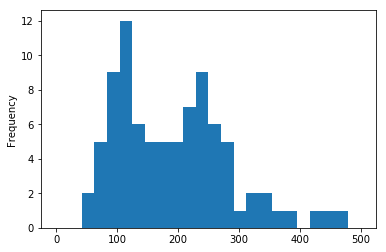

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# This assumes your data are stored in a dictionary of DataFrames called `df_subsets`
# and that the Htr3a cells are accessed with the key `htr3a`. You may need to edit this line
# see something, depending on what you did above
df_subsets["htr3a"]["ri"].plot(kind="hist", bins=np.linspace(0, 500, 25))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
**Documentation:**
[pandas.Series.plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)
</p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Viewing individual cells

The distribution looks multimodal - there is a peak around 100 MOhms and another around 250 MOhms.

Let's split up those two peaks and look at views of some individual cells. On the website, we can summarize some of the electrophysiological and morphological properties of the cells with small thumbnail representations. These thumbnails are accessible via the website, as long as you have the cell's specimen ID.

Not all cells have a morphological reconstruction; those that don't can't have a thumbnail. So we will need to only look at cells that have a reconstruction for this task.

In [12]:
# These are the URLs for getting the thumbnails - we need to provide a specimen ID
url_morph = "http://celltypes.brain-map.org/mouse/thumbnail/morphology?id="
url_ephys = "http://celltypes.brain-map.org/mouse/thumbnail/ephys_trace?id="

# We need these objects to view PNG files from the web inside the notebook
from IPython.display import Image, display

# Let's get our previous example cell's ID...
specimen_id = example_cell["id"]

# ...and plot its ephys thumbnail

url = url_ephys + str(specimen_id)
display(Image(url=url))

# We also can check whether it has a reconstruction...
print "Has reconstruction?", example_cell["has_reconstruction"]

# ..and if so, show its morphology thumbnail

if example_cell["has_reconstruction"]:
    url = url_morph + str(specimen_id)
    display(Image(url=url))

Has reconstruction? True


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The reconstruction thumbnails show the reconstructed axons in blue and the dendrites in red. Not all neurons have their axons reconstructed, so a lack of blue doesn't usually mean the axon is actually small - it just means the data were not available. The morphology is shown to fill the thumbnail, and the histogram on the right shows where those processes fall in the full cortical depth (top is near the pia).

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.7:**</p>

<p>Get the IDs of the Htr3a cells that both (1) have an input resistance below 150 MOhm and (2) have a morphological reconstruction. Show the ephys and morph thumbnails of those cells.
</p>
<p>
This is a bit more complicated of an exercise with several steps - work one step at a time and make sure you're getting results that make sense before proceeding to the next one.
</p>
<p>When you get the results, look at the cells - which traces look similar to each other? Which are different from others? Is there any correspondence between the morphology and physiology? Can you imagine other features that may separate these cells?
</div>

In [13]:
# ANSWER 

# Which Htr3a cells have an input resistance below 150 MOhm?

htr3a_below_mask = df_subsets["htr3a"]["ri"] < 150
htr3a_below_ids = df_subsets["htr3a"].index[htr3a_below_mask]

htr3a_below_with_recon = [c["id"] for c in cells
                          if c["id"] in htr3a_below_ids and c["has_reconstruction"]]

for specimen_id in htr3a_below_with_recon:
    print specimen_id
    url = url_ephys + str(specimen_id)
    display(Image(url=url))
    url = url_morph + str(specimen_id)
    display(Image(url=url))

# Things they may observe - the more superficical, compact cells have similar firing patterns.
# Fastest spiking cells are pretty compact but also deeper than the others
# The bipolar-looking cell has a transient firing pattern, unlike the others



481136138


473943881


478107198


482644550


482516216


469753383


464188580


479220013


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

### Comparing populations

As the last thing we'll do with this set of cells, let's see if the two peaks we have seen are consistent with the Vip+ and Ndnf+ sub-populations of Htr3a+ interneurons. Again, let's look at the input resistance (though remember we've just shown there is some diversity within those populations).

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.8:**</p>

<p>Compare the input resistance histograms of the Htr3a, Vip, and Ndnf cells. What relationship do you see? Can you think of ways of further investigating or refining this (very preliminary) analysis?
</p>
</div>

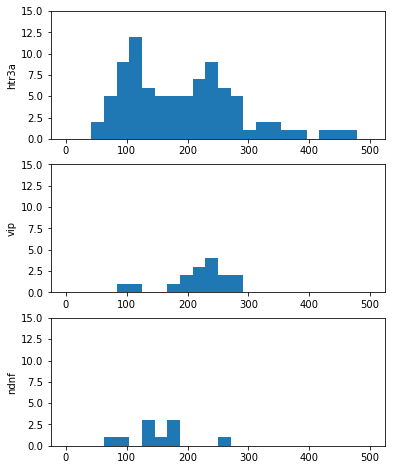

In [14]:
# ANSWER

fig, axes = plt.subplots(3, 1, figsize=(6, 8))

pops = ["htr3a", "vip", "ndnf"]

for p, ax in zip(pops, axes):
    df_subsets[p]["ri"].plot(kind='hist', ax=ax, bins=np.linspace(0, 500, 25))
    ax.set_ylabel(p)
    ax.set_ylim(0, 15)
    
# Vip looks like the higher peak. Ndnf cells are likely lower.
# Other ideas - look at other features, check the ephys thumbnails of Vip, Ndnf cells, etc.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>2. Analyzing electrophysiology sweeps</h2>

<p>
Now we'll look at a different class of interneurons - the somatostatin-positive (Sst) cells. As we've seen, there are many features pre-calculated in the Allen Cell Types Database, but it may not have everything we're interested in looking at from the original data. For example, let's look at two Sst cells where we think we see a difference in the shape of the membrane potential response in between action potentials.
</p>

In [15]:
example_sst_ids = [475049291, 313862274]
for specimen_id in example_sst_ids:
    print specimen_id
    url = url_ephys + str(specimen_id)
    display(Image(url=url))

475049291


313862274


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
We may not have a feature that illustrates this difference in the "sharpness" of the interspike interval shape. If we want to calculate other electrophysiology features, we'll need to look at where the data are stored - the NWB (Neurodata Without Borders) files. Each recorded cell has its own NWB file.
</p>
</div>

In [16]:
# Switching to accessing the external hard drive since it has Nwb files - just for preparation

ctc = CellTypesCache(manifest_file=CellTypes/manifest.json")
cells = ctc.get_cells(reporter_status=["cre reporter positive"])

OSError: [Errno 13] Permission denied: '/mnt'

In [71]:
## this saves the NWB file to 'specimen_464212183/ephys.nwb' (or just gives a handle if you already saved it)
specimen_id = 464212183
data_set = ctc.get_ephys_data(specimen_id)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
**Documentation:**
[CellTypesCache](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache),
[CellTypesCache.get_ephys_data()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_ephys_data)
</p>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
The electrophysiological data in a Cell Types NWB file is organized by "sweeps." These sweeps represent specific periods during which a single stimulus is applied to the cell and the response is recorded. Different types of stimuli can be applied to the cell, and similar stimuli are grouped by type on the web app. For example, one-second long step current injections are grouped together under the name "Long Squares." We refer to sweeps by their number, which are integers indicating the order in which the sweeps were collected.</p>

<p>
There are typically periods of time during an experiment between sweeps; this may be due to the experimentalist making some on-line adjustments, or may be intentional to allow the cell to return to some baseline after an intense stimulus. </p>

<p>
Returning to the example, we now have an object called `data_set` that provides access to the data in the NWB file through built-in methods. We can access sweep-level data like this:</p>
</div>

In [55]:
sweep_number = 30
sweep_data = data_set.get_sweep(sweep_number)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>**Documentation:**
[NwbDataSet](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.nwb_data_set.NwbDataSet), [NwbDataSet.get_sweep()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.nwb_data_set.NwbDataSet.get_sweep)
</p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.1:**</p>

<p>`data_set.get_sweep()` returns a dict with several key/value pairs. What are the data types of these values?</p>

</div>

In [57]:
# ANSWER

for k, v in sweep_data.iteritems():
    print k, type(v)

stimulus <type 'numpy.ndarray'>
stimulus_unit <type 'str'>
sampling_rate <type 'numpy.float64'>
response <type 'numpy.ndarray'>
index_range <type 'tuple'>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Getting sweeps from an NWB file</h3>

<p>Most of the sweeps in the Cell Types Database are recorded in current-clamp mode, meaning that a current stimulus is injected into the recorded cell, and a voltage response is recorded. The current data is stored in the NWB file in amperes, and the voltage data is in volts. However, it is usually more convenient to work with the data in picoamps and millivolts.</p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.2:**</p>

<p>Write code to put the stimulus (current) and response (voltage) from the sweep into variables `i` and `v`, respectively. Convert their units to pA and mV (the raw data are expressed in unscaled A/V units).</p>
</div>

In [59]:
# ANSWER

i = sweep_data["stimulus"] * 1e12
v = sweep_data["response"] * 1e3

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The time points are not included in the NWB file as a waveform, but we can generate one based on the sampling rate:
</div>

In [62]:
sampling_rate = sweep_data["sampling_rate"] # in Hz

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.3:**</p>

<p>Create a new array `t` that is the same length as `v` and `i` and contains the correct time points (in seconds) according to the sampling rate.</p>

<p>See: [numpy.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)</p>
</div>

In [63]:
t = np.arange(len(v)) * 1. / sampling_rate

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Finally, we can plot the data to see what it looks like.
</div>

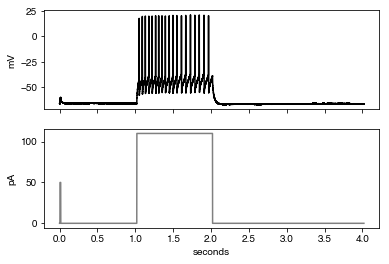

In [65]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set(ylabel="mV")
axes[1].set(ylabel="pA", xlabel="seconds")

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Calculating features of the ephys data</h3>

<p>
Plotting the data is great, but if we want to do some analysis on things like spike times, spike shapes, etc., we want to go through and extract these features from our raw data. This can be accomplished by using the feature extraction tools in the SDK.</p>
</div>

In [66]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

# This finds and analyzes features of spikes
sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
sweep_ext.process_spikes()

# We can pull out some information from the sweep_ext object once that processing is done
print "Avg spike threshold: {:.1f} mV".format(sweep_ext.spike_feature("threshold_v").mean())
print "Avg spike width: {:.2f} ms".format(1e3 * np.nanmean(sweep_ext.spike_feature("width")))

Avg spike threshold: -37.8 mV
Avg spike width: 0.88 ms


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
**Documentation:**
[EphysSweepFeatureExtractor](http://alleninstitute.github.io/AllenSDK/allensdk.ephys.html#allensdk.ephys.ephys_extractor.EphysSweepFeatureExtractor)
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The method `spike_feature()` returns a NumPy array of features for each spike. You pass it the name of the feature that you want. Features that can't be calculated for a given spike are set to `NaN`.

We can take a look at all the properties calculated for each spike by the extractor:</div>

In [67]:
sweep_ext.spike_feature_keys()

['threshold_index',
 'threshold_t',
 'threshold_v',
 'threshold_i',
 'peak_index',
 'peak_t',
 'peak_v',
 'peak_i',
 'trough_index',
 'trough_t',
 'trough_v',
 'trough_i',
 'downstroke_index',
 'downstroke',
 'downstroke_t',
 'downstroke_v',
 'upstroke_index',
 'upstroke',
 'upstroke_t',
 'upstroke_v',
 'isi_type',
 'fast_trough_index',
 'fast_trough_t',
 'fast_trough_v',
 'fast_trough_i',
 'slow_trough_index',
 'slow_trough_t',
 'slow_trough_v',
 'slow_trough_i',
 'adp_index',
 'adp_t',
 'adp_v',
 'adp_i',
 'width',
 'upstroke_downstroke_ratio']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can look at when the spikes occur by looking at the `threshold_t` property (i.e., time of spike threshold).</div>

In [69]:
spike_times = sweep_ext.spike_feature("threshold_t")

print spike_times[:5]  # print just the first 5 spike times

[ 1.05078   1.09248   1.13249   1.179015  1.221835]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Spike times and numbers of spikes are actually something that have already been calculated and stored elsewhere - if you're looking to get numbers of spikes for a big set of cells and/or sweeps, it's probably faster to get them via the database rather than re-calculating them all.</div>

In [77]:
# Get a list of data about each sweep
sweep_info = ctc.get_ephys_sweeps(specimen_id)

# Find the sweeps that use the "Long Square" protocol
ls_sweeps = [s for s in sweep_info
             if s["stimulus_name"] == "Long Square"]

# Print the number of spikes and stimulus amplitude
for sweep in ls_sweeps:
    print np.round(sweep["stimulus_absolute_amplitude"]), sweep["num_spikes"]

-110.0 None
-90.0 None
-70.0 None
-50.0 None
-30.0 None
-10.0 None
10.0 None
30.0 None
50.0 None
70.0 None
90.0 9
110.0 19
130.0 27
150.0 34
170.0 42
190.0 48
210.0 55
230.0 61
80.0 2
70.0 1
60.0 None


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
**Documentation:**
[CellTypesCache.get_ephys_sweeps()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_ephys_sweeps)
</p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Getting the interspike interal (ISI) shape</h3>

<p>Now we have the tools we need to get out the ISI shape information from our Sst (Cre line name: Sst-IRES-Cre) cells.</p>

<p>Let's start by getting the cell IDs like we did before.</p>

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.4:**</p>

<p>Store the IDs of the non-spiny, Sst+ cells in a list called `sst_ids`.</p>

</div>

In [78]:
# ANSWER

sst_ids = [c["id"] for c in cells
                       if c["transgenic_line"] == "Sst-IRES-Cre" and
                       c["dendrite_type"] != "spiny"]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<p>The shape of the ISI can change depending on how fast the cell is firing, so if we want to be consistent across cells, we should look for sweeps of a similar firing rate. But what level should that be?</p>

<p>We can look to the data to give us some idea.</p>

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.5:**</p>

<p>For the first cell in the `sst_ids` list, plot the number of spikes against the stimulus amplitude for the sweeps that:</p>

<ul>
<li>Are "Long Square" type
<li>Have a positive stimulus amplitude
<li>Have at least one spike
</ul>
</div>

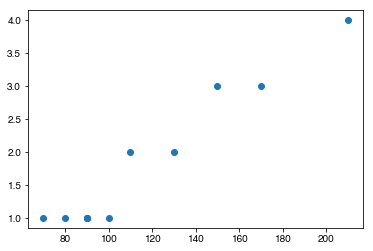

In [87]:
# ANSWER

example_id = sst_ids[0]

sweep_info = ctc.get_ephys_sweeps(example_id)

ls_sweeps = [s for s in sweep_info
             if s["stimulus_name"] == "Long Square"
             and s["num_spikes"] > 0
             and s["stimulus_absolute_amplitude"] > 0]

amps = [np.round(s["stimulus_absolute_amplitude"]) for s in ls_sweeps]
n_spikes = [s["num_spikes"] for s in ls_sweeps]

plt.plot(amps, n_spikes, 'o')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.6:**</p>

<p>Now, do the same thing for every Sst cell, and plot them all on the same plot. Use transparency (`alpha`) to help with overlaying so much data.
</div>

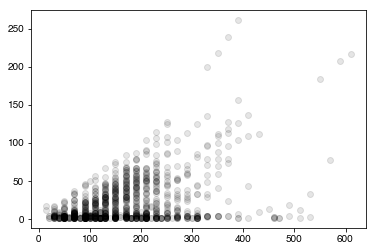

In [94]:
# ANSWER

for specimen_id in sst_ids:
    sweep_info = ctc.get_ephys_sweeps(specimen_id)

    ls_sweeps = [s for s in sweep_info
                 if s["stimulus_name"] == "Long Square"
                 and s["num_spikes"] > 0
                 and s["stimulus_absolute_amplitude"] > 0]

    # We are rounding because the floating point values can be weird
    # and we know that the amplitudes are integer-valued
    amps = [np.round(s["stimulus_absolute_amplitude"]) for s in ls_sweeps]

    n_spikes = [s["num_spikes"] for s in ls_sweeps]

    plt.plot(amps, n_spikes, 'o', c='k', alpha=0.1)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<p>The plot you just made might be hard to interpret. One reason for that is that cells will start firing at different stimulus amplitudes, and even slight differences may lead to more visual confusion. Let's re-plot the data but align them on the minimum stimulus that evoked a spike.</p>

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.7:**</p>

<p>Make a plot similar to Exercise 2.8 above, but now subtract the minimum stimulus amplitude used to evoke a spike from the absolute stimulus amplitude to better align the data on the x-axis.
</div>

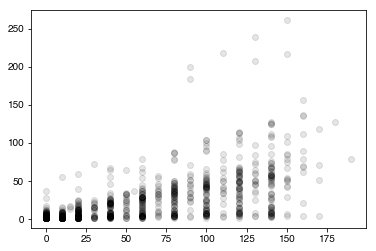

In [95]:
# ANSWER

example_id = sst_ids[0]

for specimen_id in sst_ids:
    sweep_info = ctc.get_ephys_sweeps(specimen_id)

    ls_sweeps = [s for s in sweep_info
                 if s["stimulus_name"] == "Long Square"
                 and s["num_spikes"] > 0
                 and s["stimulus_absolute_amplitude"] > 0]

    # We are rounding because the floating point values can be weird
    # and we know that the amplitudes are integer-valued
    amps = [np.round(s["stimulus_absolute_amplitude"]) for s in ls_sweeps]
    amps = np.array(amps)
    
    # I don't know why this would be true but it seems like it
    # happens for some cell on the hard drive from last year
    if len(amps) < 1: 
        continue

    amps -= amps.min()
    
    n_spikes = [s["num_spikes"] for s in ls_sweeps]

    plt.plot(amps, n_spikes, 'o', c='k', alpha=0.1)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<p>Now we can see the trend a bit better. If you look at the main trend of the more robustly-firing cells, you can see that they often fire around 50 or 60 spikes/sec at the higher amplitudes. So let's look at the ISI shape around halfway toward that rate - around 30 spikes/sec.</p>

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.8:**</p>

<p>Create a `dict` called `sweep_matches` and populate it with the number of the long square sweep has a firing rate closest to 30 spikes/sec (use the specimen ID as the key).</p>
<p>However, don't include any sweeps that have less than 2 spikes (since we cannot calculate an ISI for those).</p></div>

In [99]:
# Answer

target_rate = 30

sweep_matches = {}

for specimen_id in sst_ids:
    sweep_info = ctc.get_ephys_sweeps(specimen_id)

    ls_sweeps = [s for s in sweep_info
                 if s["stimulus_name"] == "Long Square"
                 and s["num_spikes"] > 0
                 and s["stimulus_absolute_amplitude"] > 0]
    
    # Again, some problem cell on the hard drive
    if len(ls_sweeps) < 1:
        continue
    
    spike_rates = np.array([s["num_spikes"] for s in ls_sweeps])
    spike_rate_delta = np.abs(spike_rates - target_rate)
    match_index = np.argmin(spike_rate_delta)
    if ls_sweeps[match_index]["num_spikes"] < 2:
        continue
    sweep_matches[specimen_id] = ls_sweeps[match_index]["sweep_number"]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
**Documentation:**
[numpy.abs()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html), [numpy.argmin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html)
</p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<p>We can now use the feature extractor to find the features of the spikes that will let us identify the interspike intervals. We'll define it as extending from the end of a spike (found in the feature called "`fast_trough_index`")  and the beginning of the next spike (found in teh feature called "`threshold_index`".</p>

<p>
Here's a function that will calculate the average ISI. Look it over carefully and try to figure out what is happening at each step.</p>
</div>

In [110]:
from scipy import stats

def average_isi_trajectory(dataset, sweep_num, n_points=100):
    """Average the membrane potential trajectory between spikes
    
    Parameters
    ----------
    dataset: NwbDataSet
        Data set with the ephys sweeps
    sweep: int
        Sweep number
    n_points: int
        Number of points for the resampled trace (default 100)
        
    Returns
    -------
    avg_isi: ndarray
        Averaged interspike interval membrane potential
    """
    sweep = dataset.get_sweep(sweep_num)
    
    # Extract the data from the sweep
    v = sweep["response"] * 1e3 # to mV
    t = np.arange(len(v)) / sweep["sampling_rate"] # in seconds
    
    # For Long Squares, the stimulus begins at 1.02 s and ends at 2.02 s
    ext = EphysSweepFeatureExtractor(v=v, t=t, start=1.02, end=2.02)
    
    # TODO: there's a bug in the SDK extractor we need to track down
    try:
        ext.process_spikes()
    except:
        return None
    
    # Get the starts and ends of the spikes
    threshold_indexes = ext.spike_feature("threshold_index").astype(int)
    fast_trough_indexes = ext.spike_feature("fast_trough_index").astype(int)

    # We'll store the arrays in a list so we can average them afterwards
    isis = [] 
    
    # Get the end of a spike and the start of the next one spike
    # Note the offsets in indexing of the fast_trough_indexes and threshold_indexes
    # We're using zip() to pair up the appropriate values
    for start, end in zip(fast_trough_indexes[:-1], threshold_indexes[1:]):
        v_slice = v[start:end]
        t_slice = t[start:end]
        
        # We use scipy.stats.binned_statistic() to resample to n_points
        binned, _, _ = stats.binned_statistic(t_slice, v_slice, bins=n_points)
        isis.append(binned)
    
    # We put the different ISIs on top of each other with np.vstack()
    # then average down the column with mean(axis=0)
    avg_isi = np.vstack(isis).mean(axis=0)
    return avg_isi


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
**Documentation:**
[zip()](https://docs.python.org/2/library/functions.html#zip), [scipy.stats.binned_statistic()](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.binned_statistic.html),
[numpy.vstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html)
</p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.9:**</p>

<p>Use the above function to populate a `dict` called `isi_traces` (keyed on specimen IDs) with the average ISI from the sweeps in `sweep_matches`. Plot them on top of each other (use transparency to help with overplotting).</p></div>

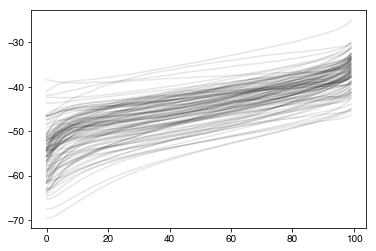

In [111]:
# ANSWER

isi_traces = {}
for specimen_id, sweep_num in sweep_matches.iteritems():
    dataset = ctc.get_ephys_data(specimen_id)
    avg_isi = average_isi_trajectory(dataset, sweep_num)
    if avg_isi is not None:
        isi_traces[specimen_id] = avg_isi
    
for avg_isi in isi_traces.values():
    plt.plot(avg_isi, c="k", alpha=0.1)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.10:**</p>

<p>You may be able to see some differences in the ISI shape, but, again, aligning the data may improve your ability to see patterns. Plot these traces again, but normalize the voltage so that they all start at 0 and end at 1.</p></div>

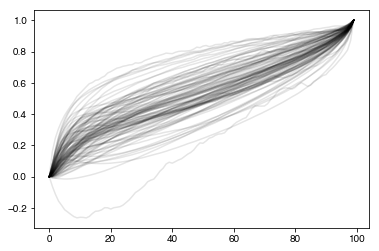

In [112]:
# ANSWER

for avg_isi in isi_traces.values():
    norm_avg_isi = (avg_isi - avg_isi[0]) / (avg_isi[-1] - avg_isi[0])
    plt.plot(norm_avg_isi, c="k", alpha=0.1)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.11:**</p>

<p>This is the last exercise, and it is intentionally open-ended.</p>

<p>Try to think of a feature (i.e. a number or maybe a set of numbers) that would capture the differences you see in the ISI shape. You may need to do something like average a particular interval or take the derivative of the trace.</p>

<p>Implement your feature calculation in a function and apply it to the traces. See if it separates the cells as you think it should - you can plot the ephys thumbnails as we did above as one way of checking for that.</p>

<p>Future directions you can go could be things like:</p>

<ul>
<li>Does this ISI shape difference correlate with other things I know about the cell (its depth in cortex? its morphology? other electrophysiological features?)?
<li>How much does the feature you created change within a given cell as the stimulus amplitude changes?
<li>Are differences more pronounced at lower spike rates? Higher spike rates?
</ul>

</div>

### PROJECT IDEAS

_from last year_:
* Examine how ephys / morph features vary across Cre-line, layer, and/or cortical location
* Attempt to classify cells using ephys data/features (e.g., use machine learning to predict Cre line)
* Calculate “dendrite density clouds” after orienting and averaging morphologies
* Look at whether truncation of apical dendrites is linked to differences in any ephys features
* Connect Brain Observatory functional properties to ephys intrinsic properties
* Perform Sholl analysis on neuronal morphologies
* Look for correlations between ephys data and Gene Expression and Taxonomy in V1

### FUNCTION IDEAS

* cells for a given cre line
* plot a set of cell thumbnails in a notebook via the web
* v, i, and t for a given sweep & data set